## VERİ SETİ 

Bu veri seti, 2019 yılına ait Airbnb evlerinin bilgilerini içerir. 

Sütunlar:
- unified_id: Airbnb mülkünün benzersiz bir kimliğini belirtir.
- month: Verilerin ait olduğu ayı belirtir.
- zipcode: Airbnb mülkünün bulunduğu posta kodunu içerir.
- city: Airbnb mülkünün bulunduğu şehri belirtir.
- host_type: Ev sahibinin mülk tipini belirtir (örneğin, ev, daire, villa gibi).
- bedrooms: Airbnb mülkünde bulunan yatak odası sayısını belirtir.
- bathrooms: Airbnb mülkünde bulunan banyo sayısını belirtir.
- guests: Mülkte konaklayabilecek maksimum misafir sayısını belirtir.
- revenue: Belirli bir dönemde mülkten elde edilen geliri belirtir.
- openness: Mülkün ne kadar sıklıkla kullanıldığını veya ne kadar süreyle kullanılamaz olduğunu belirten bir oran.
- occupancy: Mülkün doluluk oranını belirtir.
- nightly_rate: Günlük kira ücretini belirtir.
- lead_time: Rezervasyon yapıldığı tarih ile konaklama başlangıç ​​tarihi arasındaki süreyi belirtir.
- length_stay: Ortalama konaklama süresini belirtir.

## **KÜTÜPHANELERİN IMPORT EDİLMESİ**

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings

# Uyarılar görmezden gelinir 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## **VERİ SETİNİN ELDE EDİLMESİ**

In [319]:
df = pd.read_csv("dataset/market_analysis_2019.csv", sep=";")  # veriler ; ile ayrılmış, bunu belirtmek gerekiyor / , ile ayrılmışsa parametreyi eklemeye gerek yok

In [320]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,"13948,75974",31,1,"449,9599915",8,65
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,"449,9599915",31,"0,032258065","449,9599915",8,1
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,30,0,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2.0,10,"4949,679932",31,"0,35483871","449,9709029",41,"2,4"
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,28,0,NaN,NaN,NaN


In [321]:
# Boşluk içeren sütun adlarını _ ile düzenleme
# Bunun nedeni sütun isimlerini "df.sütun_ismi" şeklinde kullanınca hatalar ile karşılaşılmasını önlemektir.
def clean_column_names(df):
    new_columns = []
    for col in df.columns:
        new_col = col.replace(' ', '_')  # Boşlukları _ ile değiştir
        new_columns.append(new_col)
    df.columns = new_columns
    return df

df = clean_column_names(df)

In [322]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,"13948,75974",31,1,"449,9599915",8,65
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,"449,9599915",31,"0,032258065","449,9599915",8,1
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,30,0,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2.0,10,"4949,679932",31,"0,35483871","449,9709029",41,"2,4"
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,28,0,NaN,NaN,NaN


## **KEŞİFSEL VERİ ANALİZİ (EDA - EXPLORATORY DATA ANALYSIS)**

In [324]:
def review_dataset(file_path):
    df = pd.read_csv(file_path, sep=";")  # veriler ; ile ayrılmış, bunu belirtmek gerekiyor / , ile ayrılmışsa parametreyi eklemeye gerek yok
    # regular expression ile dosya adını ayıklayın
    data_set_name = re.findall(r"([^/]*$)", file_path)[0]  # veri seti ismi re kütüphanesi ile elde edilir

    print(f"Veri Seti İsmi: {data_set_name}")
    print("------------------------------------------------------------------------------------------------------")
    print(f"Veri Seti İsmi: {df.shape} / Satır Sayısı: {df.shape[0]} / Sütun Sayısı: {df.shape[1]}")
    print("------------------------------------------------------------------------------------------------------")
    print(f"Veriseti Sütunlar: \n {df.columns}")
    print("------------------------------------------------------------------------------------------------------")
    print(f"Veriseti Veri Tipleri: \n {df.dtypes}")
    print("------------------------------------------------------------------------------------------------------")
    print("Veriseti Hakkında özet Bilgi: \n")
    df.info()
    print("------------------------------------------------------------------------------------------------------")
    print(f"Veriseti İlk 3 Satır: \n {df.head(3)}")
    print("------------------------------------------------------------------------------------------------------")
    print(f"Veriseti Sütunlarında Eksik Veri Kontrolü: \n {df.isnull().sum()}")
    print("------------------------------------------------------------------------------------------------------")


In [325]:
# veri setinin dosya yolu verilir
file_path = "dataset/market_analysis_2019.csv"
review_dataset(file_path)

Veri Seti İsmi: market_analysis_2019.csv
------------------------------------------------------------------------------------------------------
Veri Seti İsmi: (29928, 14) / Satır Sayısı: 29928 / Sütun Sayısı: 14
------------------------------------------------------------------------------------------------------
Veriseti Sütunlar: 
 Index(['unified_id', 'month', 'zipcode', 'city', 'host_type', 'bedrooms',
       'bathrooms', 'guests', 'revenue', 'openness', 'occupancy',
       'nightly rate', 'lead time', 'length stay'],
      dtype='object')
------------------------------------------------------------------------------------------------------
Veriseti Veri Tipleri: 
 unified_id       object
month            object
zipcode           int64
city             object
host_type        object
bedrooms          int64
bathrooms       float64
guests           object
revenue          object
openness          int64
occupancy        object
nightly rate     object
lead time        object
length st

In [326]:
df.describe() # sadece sayısal sütunlar için bilgiler
# count: veri sayısı , mean: ortalaması, std: standart sapması, min: minimum değeri, max: maksimum değeri 

,zipcode,bedrooms,bathrooms,openness
count,29928.000000,29928.000000,29928.000000,29928.000000
mean,92307.870155,3.383420,2.405540,28.870422
std,18.431247,0.610313,0.799043,5.457030
min,92252.000000,3.000000,1.000000,1.000000
25%,92314.000000,3.000000,2.000000,30.000000
50%,92315.000000,3.000000,2.000000,31.000000
75%,92315.000000,4.000000,3.000000,31.000000
max,92315.000000,5.000000,7.000000,31.000000


In [327]:
df.dtypes

unified_id       object
month            object
zipcode           int64
city             object
host_type        object
bedrooms          int64
bathrooms       float64
guests           object
revenue          object
openness          int64
occupancy        object
nightly_rate     object
lead_time        object
length_stay      object
dtype: object

### **Tip Dönüşümleri**

Bazı object tipine sahip değişkenler sayısal bir anlam içermektedir.

- bathrooms: Airbnb mülkünde bulunan banyo sayısını belirtir.
- guests: Mülkte konaklayabilecek maksimum misafir sayısını belirtir.
- revenue: Belirli bir dönemde mülkten elde edilen geliri belirtir.
- occupancy: Mülkün doluluk oranını belirtir.
- nightly_rate: Günlük kira ücretini belirtir.
- lead_time: Rezervasyon yapıldığı tarih ile konaklama başlangıç ​​tarihi arasındaki süreyi belirtir.
- length_stay: Ortalama konaklama süresini belirtir.


In [328]:
df.head() # ilk 5 satır

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,"13948,75974",31,1,"449,9599915",8,65
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,"449,9599915",31,"0,032258065","449,9599915",8,1
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,30,0,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2.0,10,"4949,679932",31,"0,35483871","449,9709029",41,"2,4"
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2.0,10,0,28,0,NaN,NaN,NaN


In [329]:
# "bathrooms" float olarak kalması görünüm için daha iyi
df['bathrooms'] = df['bathrooms'].astype(int)

In [330]:
# "guests" object fakat sayısal bir değer taşır o yüzden int tipine dönüştüeülmeli. Ayrıca '15+' ifadelerini '16' olarak değiştirilir.
df['guests'] = df['guests'].replace('15+', '16').astype('Int64')

In [331]:
# "revenue" object fakat sayısal bir değer taşır o yüzden float tipine dönüştüeülmeli. 
df['revenue'] = df['revenue'].str.replace(',', '.').astype(float) # Virgül yerine nokta kullanarak string verileri float'a dönüştürme

In [332]:
# "occupancy" object fakat sayısal bir değer taşır o yüzden float tipine dönüştüeülmeli. 
df['occupancy'] = df['occupancy'].str.replace(',', '.').astype(float) 

In [333]:
# "nightly_rate" object fakat sayısal bir değer taşır o yüzden float tipine dönüştüeülmeli.
df['nightly_rate'] = df['nightly_rate'].str.replace(',', '.').astype(float) 

In [334]:
# "lead_time" object fakat sayısal bir değer taşır o yüzden float tipine dönüştüeülmeli.
df['lead_time'] = df['lead_time'].str.replace(',', '.').astype(float) 

In [335]:
# "length_stay" object fakat sayısal bir değer taşır o yüzden float tipine dönüştüeülmeli.
df['length_stay'] = df['length_stay'].str.replace(',', '.').astype(float)

In [336]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2,10,13948.759740,31,1.000000,449.959992,8.0,65.0
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.0,1.0
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.0,2.4
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,NaN,NaN,NaN


### **Kategorik, Kardinal, Sayısal Sütunların Belirlenmesi**

* Sütunlaradaki eşsiz değerler ve bu eşsiz değerlerin sayısı belirlenir. Bu sayede kategorik ve kardinal verileri ayırabilmek için eşik değerler belirlenir.

In [337]:
# Sütunlaradaki eşsiz değerler
for i in df.columns:
    print(f"{i} sütunundaki eşsiz değerler: \n {df[i].unique()}")
    print("--------------------------------------------------------------------------------")

unified_id sütunundaki eşsiz değerler: 
 ['AIR10000347' 'AIR10035983' 'AIR10052559' ... 'AIR9976790' 'AIR9986505'
 'AIR9996370']
--------------------------------------------------------------------------------
month sütunundaki eşsiz değerler: 
 ['2019-1' '2019-10' '2019-11' '2019-12' '2019-2' '2019-3' '2019-4'
 '2019-5' '2019-6' '2019-7' '2019-8' '2019-9']
--------------------------------------------------------------------------------
zipcode sütunundaki eşsiz değerler: 
 [92315 92252 92314 92284]
--------------------------------------------------------------------------------
city sütunundaki eşsiz değerler: 
 ['Big Bear Lake' 'Joshua Tree' 'Big Bear City' 'Yucca Valley']
--------------------------------------------------------------------------------
host_type sütunundaki eşsiz değerler: 
 ['2-5 Units' 'Single Owners' 'Professionals']
--------------------------------------------------------------------------------
bedrooms sütunundaki eşsiz değerler: 
 [3 5 4]
---------------------

In [338]:
# Sütunlardak eşsiz değerlerin sayısı 
print("Sütun Adı - Unique Değer Sayısı")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Sütun Adı - Unique Değer Sayısı
unified_id: 3136
month: 12
zipcode: 4
city: 4
host_type: 3
bedrooms: 3
bathrooms: 7
guests: 13
revenue: 21833
openness: 31
occupancy: 307
nightly_rate: 20651
lead_time: 4677
length_stay: 671


- **Kategorik:** Kategorik değişkenler genellikle "object" türündedirler, birbirinden ayrı kategorilere ait farklı grupları temsil eder. Bu gruplar genellikle belirli bir sınıflandırmaya göre ayrılır ve sütun içindeki her bir değer bir kategoriye aittir. Örneğin, cinsiyet, şehir, posta kodları, ürün tipi gibi değişkenler kategoriktir.

- **Kardinal:** Kardinal değişkenler genellikle "object" türündedirler, bir sütun içindeki benzersiz değerlerin sayısını ifade eder. Yüksek kardinaliteye sahip bir değişken, birçok farklı değere sahip olabilirken, düşük kardinaliteye sahip bir değişken, az sayıda farklı değere sahip olacaktır. Örneğin, müşteri kimlik numarası gibi benzersiz tanımlayıcılar kardinal değişkenlerdir.

- **Sayısal (Numerik):** Sayısal değişkenler genellikle "int64" veya "float64" türündedirler, sayısal değerlerin temsil edildiği değişkenlerdir. Bu değişkenler üzerinde matematiksel işlemler yapılarak analizler gerçekleştirilir. Örneğin, yaş, gelir, sıcaklık gibi değişkenler sayısal değişkenlerdir ve gerçek sayıları temsil ederler.

In [185]:
# cat_th: Bir sütunun kategorik olarak kabul edilmesi için eşik değeri. 
# cat_th = 15 olarak belirlenmiştir çünkü 15ten az sayıda farklı değişkene sahip olan sütunun kategorik olduğu düşünülmektedir.

# car_th: Bir sütunun kategorik ancak kardinal (yüksek kardinaliteye sahip) olarak kabul edilmesi için eşik değeri.
# car_th = 30 olarak belirlenmiştir. Çünkü 30dan fazla sayıda farklı değişkene sahip olan sütunun kardinal olduğu düşünülmektedir.

# kod kaynak: https://github.com/Enes-CE/Netflix-Data-Analys

def column_detection(dataframe: pd.DataFrame, cat_th: int = 15, car_th: int = 30):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] # Object ise

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    # num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [339]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['month', 'city', 'host_type', 'zipcode', 'bedrooms', 'bathrooms', 'guests']

##################### Numeric #####################
['zipcode', 'bedrooms', 'bathrooms', 'guests', 'revenue', 'openness', 'occupancy', 'nightly_rate', 'lead_time', 'length_stay']

##################### Categoric But Cardinal #####################
['unified_id']

##################### Numeric But Categoric #####################
['zipcode', 'bedrooms', 'bathrooms', 'guests']

##################### Columns Overview #####################
Observations: 29928
Variables: 14
cat_cols: 7
num_cols: 10
cat_but_car: 1
num_but_cat: 4


## **VERİ TEMİZLEME VE ÖN İŞLEME**

In [340]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2,10,13948.759740,31,1.000000,449.959992,8.0,65.0
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.0,1.0
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.0,2.4
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,NaN,NaN,NaN


In [341]:
df.dtypes

unified_id       object
month            object
zipcode           int64
city             object
host_type        object
bedrooms          int64
bathrooms         int32
guests            Int64
revenue         float64
openness          int64
occupancy       float64
nightly_rate    float64
lead_time       float64
length_stay     float64
dtype: object

### **Eksik Verilerin Doldurulması** 

In [342]:
df.isnull().sum() # sütunlardaki eksik veriler kontrol edilir, bu veriler daha sonra doldurulacak

unified_id         0
month              0
zipcode            0
city               0
host_type          0
bedrooms           0
bathrooms          0
guests             0
revenue           16
openness           0
occupancy          0
nightly_rate    6442
lead_time       8031
length_stay     8031
dtype: int64

<Axes: >

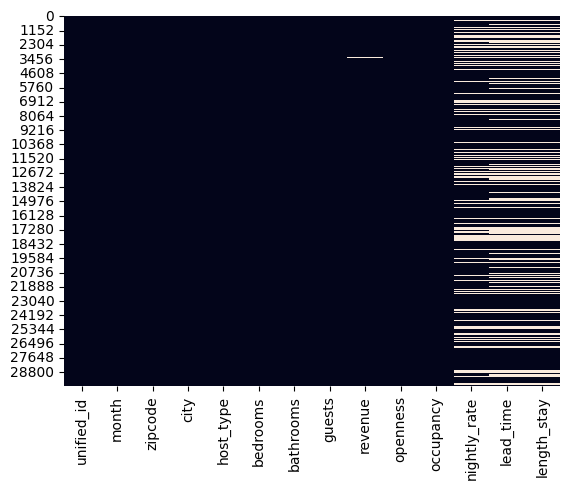

In [343]:
# Eksik değerlerin görselleştirilmesi 
sns.heatmap(df.isnull(), cbar=False) 

In [27]:
# SÜTUNUN EN ÇOK TEKRAR EDEN DEĞERİ İLE DOLDURMA 
# 'eksik_sütun' sütunundaki eksik değerler, en çok tekrar eden değerle doldurulur. / Kategorik veriler için daha uygun.
"""
#veride bunun için uygun ve eksik veriye sahip bir sütun yok.
most_common_cabin = df['eksik_sütun'].value_counts().idxmax()
df['eksik_sütun'].fillna(most_common_cabin, inplace=True)
"""

"\n#veride bunun için uygun ve eksik veriye sahip bir sütun yok.\nmost_common_cabin = df['eksik_sütun'].value_counts().idxmax()\ndf['eksik_sütun'].fillna(most_common_cabin, inplace=True)\n"

In [344]:
# SÜTUNUN ORTALAMA DEĞERİ İLE DOLDURMA
# 'eksik_sütun' sütunundaki eksik değerler, o sütunun ortalamasıyla doldurulur. / Sayısal veriler için daha uygun.
df['nightly_rate'].fillna(df['nightly_rate'].mean(), inplace=True)
df['lead_time'].fillna(df['lead_time'].mean(), inplace=True)
df['length_stay'].fillna(df['length_stay'].mean(), inplace=True)

In [345]:
# EKSİK DEĞER SAYISI AZ OLANLARI SİLME 
df.dropna(subset=['revenue'], inplace=True)

In [346]:
df.isnull().sum() # tekrar kontrol edilir, artık eksik veriye sahip sütun yok

unified_id      0
month           0
zipcode         0
city            0
host_type       0
bedrooms        0
bathrooms       0
guests          0
revenue         0
openness        0
occupancy       0
nightly_rate    0
lead_time       0
length_stay     0
dtype: int64

### **Aykırı Verilerin Temizlenmesi**

- IQR (Interquartile Range) yöntemi kullanılarak veri setindeki değerlerin çeyrekliklerine dayanarak aykırı değerler tespit edile bu değerler veri setinden temizlenir.
- Genellikle sayısal sütunlar için uygulanan bir yöntemdir, çünkü temel olarak verilerin dağılımını hesaplamak için istatistiksel kavramlara dayanır.

Aaşağıdaki sütunlar için bu işlemi yapmanın daha mantıklı olacağını düşündüm çünkü farklı değere sahip veri sayısı çok ve aykırı değer olması ihtimal.
* revenue: 21833 
* nightly rate: 20651
* lead time: 4677
* length stay: 671

<Axes: >

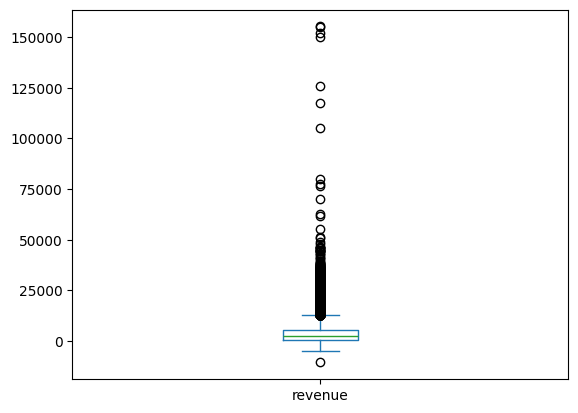

In [347]:
df['revenue'].plot(kind='box')  # Kutu grafiği çizdirilir.

* Bir kutu grafiğinde IQR, kutunun alt ve üst sınırlarını belirleyen Q1 ve Q3 değerleri arasındaki uzaklığı temsil eder.
* Grafikteki daireler aykırı değerleri ifade eder.

In [348]:
# Dataframe'de ilgili sütundaki aykırı verilerin temizlenmesi için fonksiyon oluşturulmuştur.

def outliers_remove_with_iqr(column_name, df):
    Q1 = df[column_name].quantile(0.25)  # ilk çeyreklik
    Q3 = df[column_name].quantile(0.75)  # üçüncü çeyreklik
    IQR = Q3 - Q1 # QR (Interquartile Range) hesaplanır
    print(f"Q1: {Q1} / Q3: {Q3} / IQR: {IQR}") 
    # IQR kullanılarak aykırı değerlerin sınırları belirlenir. 
    aykiri_Q3tenbuyuk = Q3 + 1.5*IQR  # bir değer, Q1'den 1.5 * IQR çıkarıldığında daha küçükse bu değer bir aykırı değer olarak kabul edilir
    aykiri_Q1denkucuk = Q1 - 1.5*IQR  # bir değer, Q3'ten 1.5 * IQR eklenerek daha büyükse bu değer bir aykırı değer olarak kabul edilir
    print(f"Q3'ten büyük aykırı değer: {aykiri_Q3tenbuyuk} / Q1'den küçük aykırı değer: {aykiri_Q1denkucuk}")

    # mantıksal sınamanın true olduğu durumaları döndürür
    print("Mantıksal sınamaya göre aykırı değerlerin sayısı:")
    print(np.where(df[column_name] > aykiri_Q3tenbuyuk)[0].shape , np.where(df[column_name] < aykiri_Q1denkucuk)[0].shape)

    # Belirlenen aykırı değerler bir koşul ile birlikte veri setinden temizlenir.
    # Koşul belirlenir
    condition = ~((df[column_name] > aykiri_Q3tenbuyuk) | (df[column_name] < aykiri_Q1denkucuk)) # Aykırı verilerin dışında olan veriler belirlenir
    # Bu koşulu sağlan veriler ile yeni dataframe oluşturulmuş olur.
    df = df.loc[condition]
    print("Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.")
    
    return df  # aykırı değer temizlenmiş veri seti döndürülür
    

In [356]:
df = outliers_remove_with_iqr("revenue", df)

Q1: 249.9700012 / Q3: 4592.400024 / IQR: 4342.430022799999
Q3'ten büyük aykırı değer: 11106.045058199998 / Q1'den küçük aykırı değer: -6263.675032999999
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(0,) (0,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.


In [357]:
df.shape

(27969, 14)

<Axes: >

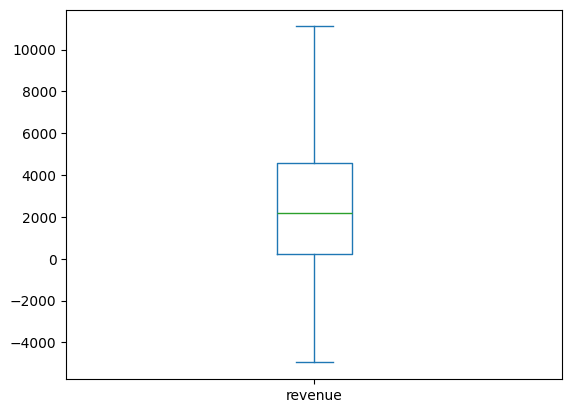

In [358]:
df['revenue'].plot(kind='box') # Daha iyi bir grafik elde edildi

<Axes: >

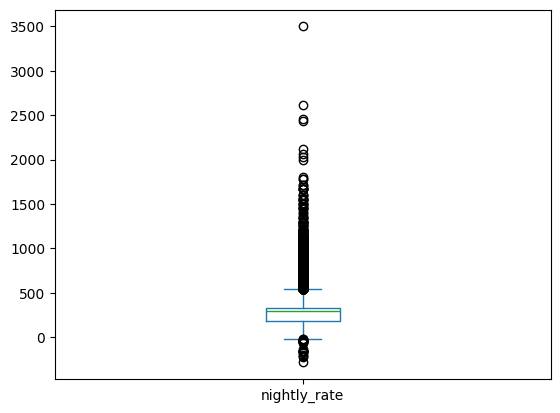

In [359]:
df['nightly_rate'].plot(kind='box')

Q1: 181.2324963 / Q3: 327.04738032354703 / IQR: 145.81488402354702
Q3'ten büyük aykırı değer: 545.7697063588676 / Q1'den küçük aykırı değer: -37.48982973532051
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(0,) (0,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.


<Axes: >

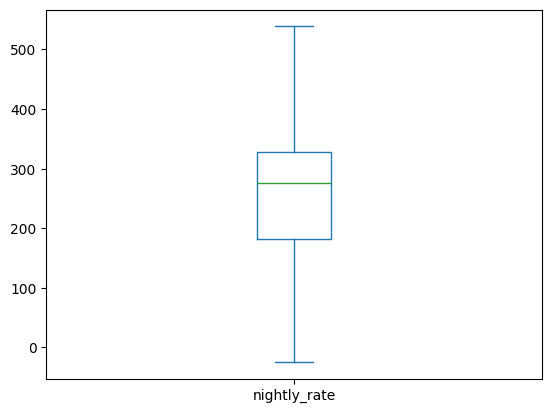

In [362]:
df = outliers_remove_with_iqr("nightly_rate", df)
df['nightly_rate'].plot(kind='box')

<Axes: >

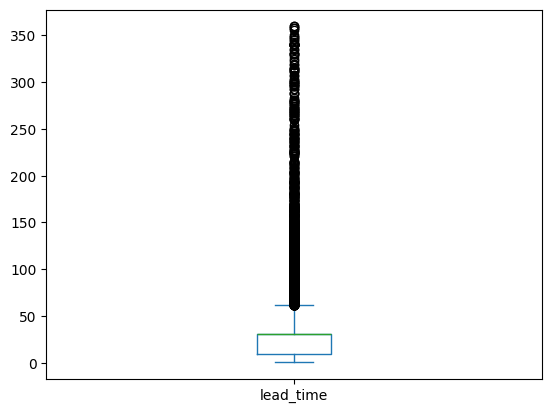

In [363]:
df['lead_time'].plot(kind='box')

Q1: 9.2 / Q3: 30.968203896761153 / IQR: 21.768203896761154
Q3'ten büyük aykırı değer: 63.620509741902886 / Q1'den küçük aykırı değer: -23.452305845141733
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(0,) (0,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.


<Axes: >

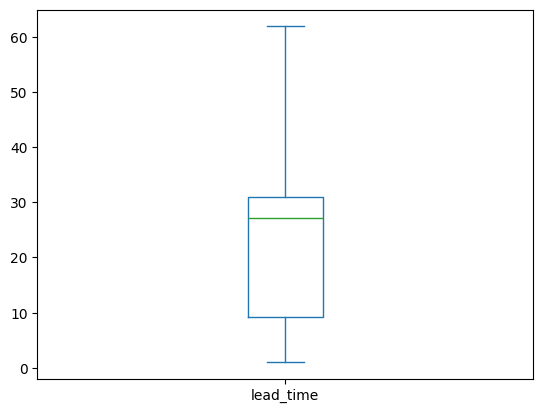

In [367]:
df = outliers_remove_with_iqr("lead_time", df)
df['lead_time'].plot(kind='box')

<Axes: >

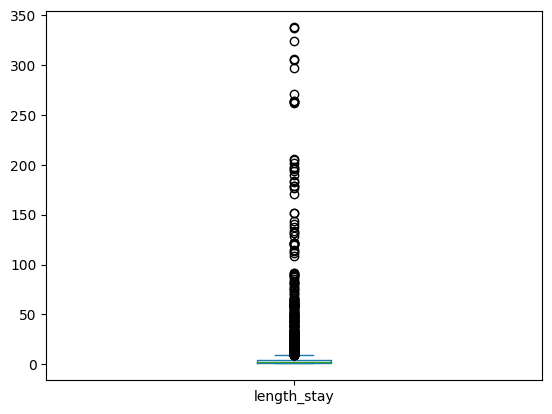

In [368]:
df['length_stay'].plot(kind='box')

Q1: 1.7 / Q3: 4.749502715945883 / IQR: 3.0495027159458825
Q3'ten büyük aykırı değer: 9.323756789864706 / Q1'den küçük aykırı değer: -2.8742540739188236
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(0,) (0,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.


<Axes: >

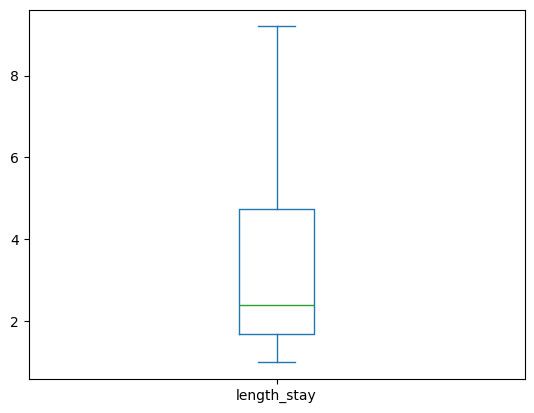

In [370]:
df = outliers_remove_with_iqr("length_stay", df)
df['length_stay'].plot(kind='box')

In [371]:
print("Veri seti boyutu: ", df.shape)
# Aykırı değerler silindiği için verisetinin boyuyutu da azaldı. Satır sayısı azaldı.

Veri seti boyutu:  (23597, 14)


## **TEMEL İSTATİSTİKSEL ANALİZLER**

- Mod: Bir veri kümesinde en sık tekrar eden değerdir. Mod, veri setinin en yaygın olan noktasını belirtir.

- Ortalama (Mean): Bir veri kümesindeki tüm değerlerin toplamının veri kümesinin eleman sayısına bölünmesiyle elde edilir. Ortalama, veri setinin merkezini temsil eder.

- Medyan: Bir veri kümesindeki değerlerin küçükten büyüğe sıralandığında ortadaki değerdir. Eğer veri setinde tek sayıda eleman varsa, medyan tek bir değerdir; ancak çift sayıda eleman varsa, medyan iki ortanca değerin ortalamasıdır. Medyan, veri setinin merkezindeki değeri belirtir.

- Standart Sapma: Bir veri kümesindeki değerlerin ortalama etrafındaki yayılımını ölçer. Küçük standart sapma, veri noktalarının ortalama etrafında yoğunlaştığını, büyük standart sapma ise veri noktalarının ortalama etrafında daha da yayıldığını gösterir. Standart sapma, veri setinin dağılımını ölçer.


***Medyan ve Ortalama Arasındaki İlişki***

Eğer veri setinin ortalaması, medyandan daha küçükse, bu durumda veri sola çarpıktır (left-skewed).  
* Sol çarpıklık, verilerin çoğunlukla yüksek değerlerde toplandığı ancak birkaç düşük değerle genişlediği bir dağılımı ifade eder. Bu durumda, verilerin büyük çoğunluğu küçük değerlerde toplanmıştır ve sağa doğru bir uzantı gözlemlenir.

Eğer veri setinin ortalaması, medyandan daha büyükse, bu durumda veri sağa çarpıktır (right-skewed).
* Sağ çarpıklık, veri dağılımının sağa doğru eğilimli olduğunu ifade eder. Yani, verilerin çoğunluğunun küçük değerlerde toplandığı, ancak birkaç yüksek değerle genişlediği bir dağılımı gösterir. 


***Histogram Grafiklerinde***

***Sol çarpıklık*** durumunda ise, verilerin sol tarafta sıkıştığı ve sağ tarafta birkaç yüksek değerle genişlediği bir dağılım gözlemlenecektir. Histogramda, ***yüksek değerlerin sağ tarafında yüksek sıklık*** görülecektir, ancak ***sol taraf daha seyrek*** olacaktır.

***Sağa çarpık*** bir dağılımda, verilerin sağa doğru eğilimli olduğunu ve genellikle düşük değerlerde sıkıştığını, ancak birkaç yüksek değerle genişlediğini görebilirsiniz. Histogramda, ***düşük değerlerin sol tarafında yüksek sıklık*** görülecektir, ancak ***yüksek değerler sağ tarafta daha seyrek*** olacaktır.


In [372]:
def statistical_analysis(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Mod hesaplama
    mode_value = column_data.mode()[0]

    # Ortalama hesaplama
    mean_value = column_data.mean()

    # Medyan hesaplama
    median_value = column_data.median()

    # Standart sapma hesaplama
    std_value = column_data.std()

    # Sonuçları yazdırma
    print("Sütun Adı:", column_name)
    print("Mod:", mode_value)
    print("Ortalama:", mean_value)
    print("Medyan:", median_value)
    print("Standart Sapma:", std_value)


In [373]:
def his_grap(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, color='green')
    plt.title('Histogram - ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


In [374]:
statistical_analysis(df, 'revenue')

Sütun Adı: revenue
Mod: 0.0
Ortalama: 2463.418712540307
Medyan: 1760.779953
Standart Sapma: 2586.2028426421984


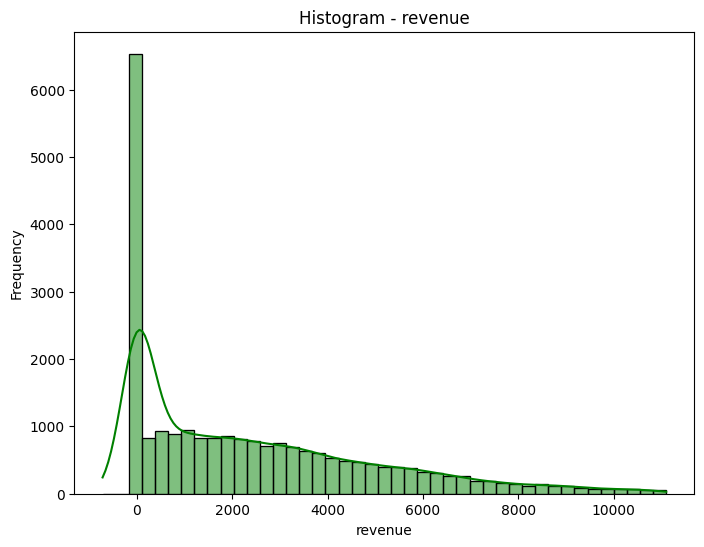

In [375]:
his_grap(df, "revenue")

**"revenue" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Ortalama değerin yüksekliği ve modun 0.0 olması, veri setinde büyük farklılıklar (outlier'lar) olabileceğini düşündürür, bu yüzden aykırı veri kontrolü tekrak yapılır.
- Ortalama değer, medyandan daha büyük olması, veri setinin sağa çarpık olduğunu işaret eder. Bu durum, yüksek gelir değerlerinin ortalamayı yukarı çektiğini gösterir.
- Grafiğe göre de düşük değerlerin sol tarafında yüksek sıklık görülmektedir ve sağa çarpıklık yer almaktadır.
- Yüksek bir standart sapma değeri (2586.20), gelir değerlerinin ortalama etrafında geniş bir dağılıma sahip olduğunu gösterir. Gelirlerin büyük ölçüde farklılık gösterdiği anlamına gelir.
- Grafiğe göre verilerin çoğu 4.000 ile 6.000 arasındaki bir gelir aralığında yoğunlaşmıştır.

In [376]:
statistical_analysis(df,'openness')

Sütun Adı: openness
Mod: 31
Ortalama: 28.725558333686486
Medyan: 30.0
Standart Sapma: 5.756283431102281


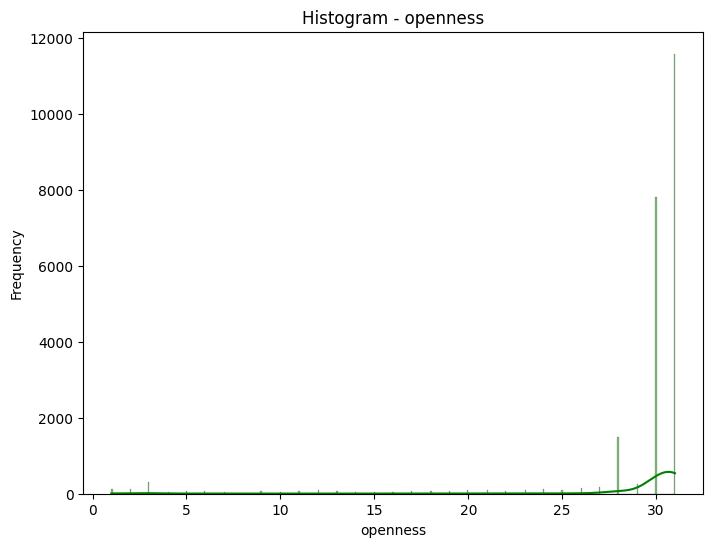

In [377]:
his_grap(df,"openness")

**"openness" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Veriler genellikle 28-31 civarında yoğunlaşmış, ortalama ve medyan birbirine yakın, yayılım makul düzeydedir. 
- Grafiğe göre de verilerin çoğu 28-31 civarında yoğunlaşmış. 
- Standart sapma değeri, "openness" değerlerinin ortalama etrafında makul bir yayılım gösterdiğini belirtir. Bu, "openness" değerlerinin genel olarak birbirine çok uzak olmadığını gösterir.
- Ortalama değerin medyandan daha küçük ve yakın olması veri seti büyük olasılıkla simetrik veya hafif sola çarpık olduğunu gösterir.
- Grafiğe göre de veriler hafif sola çarpıktır.

In [378]:
statistical_analysis(df,'occupancy')

Sütun Adı: occupancy
Mod: 0.0
Ortalama: 0.3541011595509175
Medyan: 0.321428571
Standart Sapma: 0.32399533502884215


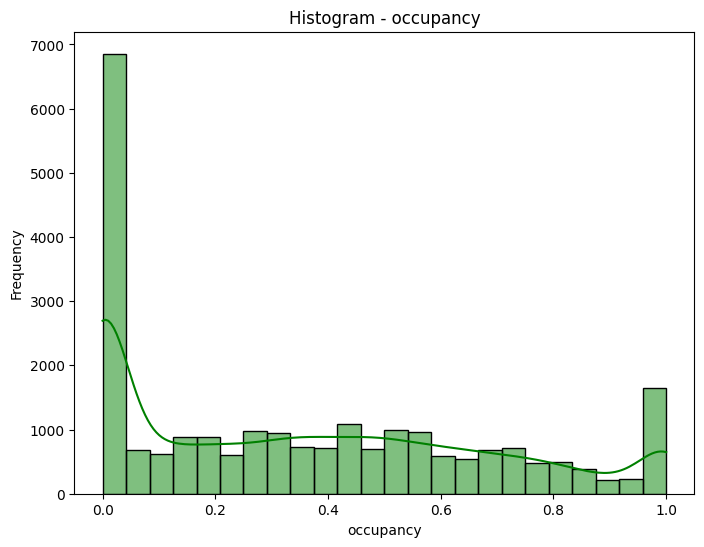

In [379]:
his_grap(df,"occupancy")

**"occupancy" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Medyan değerin ortalamaya yakın olması, veri setinin genel dağılımının nispeten simetrik olduğunu gösterir.
- Grafikte de dağılımın simetrik olduğu görülmektedir. 
- Standart sapma değeri, doluluk oranlarının ortalama etrafında oldukça geniş bir aralıkta dağıldığını gösterir.
- Grafiğe göre de veriler geniş bir aralıkta dağılmıştır.

In [380]:
statistical_analysis(df,'nightly_rate')

Sütun Adı: nightly_rate
Mod: 327.04738032354703
Ortalama: 265.61945376103137
Medyan: 282.1375008
Standart Sapma: 100.43840177940409


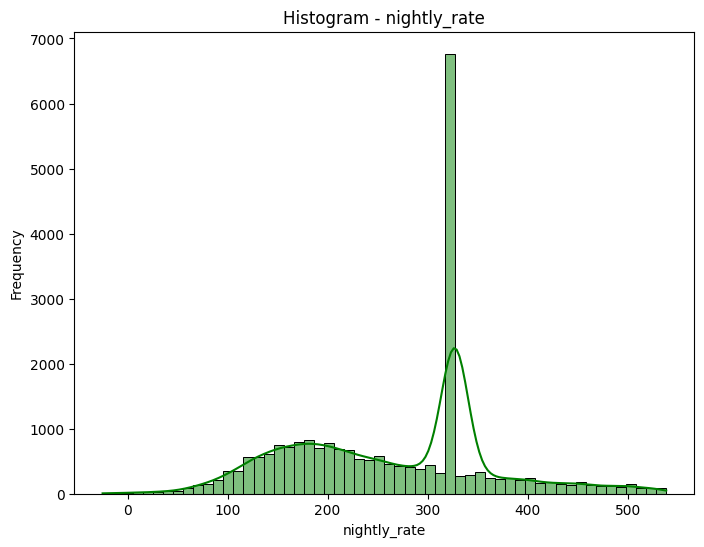

In [381]:
his_grap(df,"nightly_rate")

**"nightly_rate" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Ortalamanın medyandan düşük olması, veri setinin hafifçe sola çarpık olduğunu düşündürür. Bu, birkaç düşük gecelik ücretin ortalamayı aşağı çektiği anlamına gelir.
- Grafikte de düşük değerler sağ tarfta seyrek olduğundan hafif sola çarpıklık vardır.
- Standart sapma değeri, gecelik ücretlerin ortalama etrafında geniş bir dağılıma sahip olduğunu gösterir. Ücretlerin oldukça değişken olduğunu ve farklı aralıklarda yer aldığını belirtir.

In [382]:
statistical_analysis(df,'lead_time')

Sütun Adı: lead_time
Mod: 30.968203896761153
Ortalama: 22.653644062416504
Medyan: 27.5625
Standart Sapma: 14.120035840097861


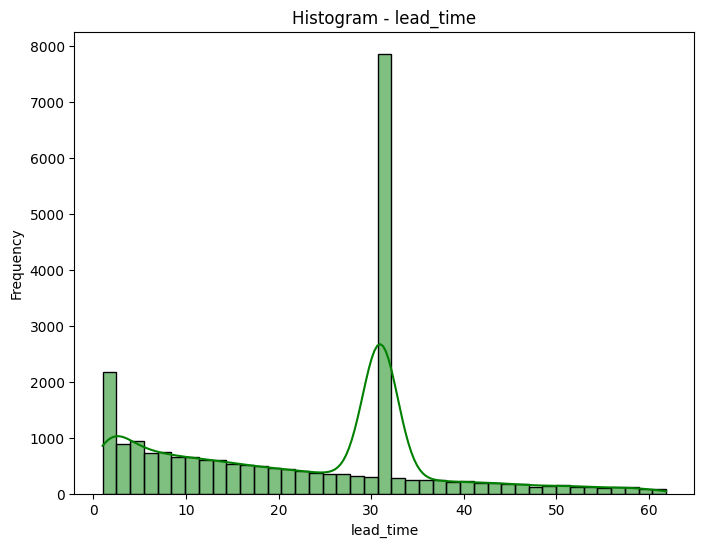

In [383]:
his_grap(df,"lead_time")

**"lead_time" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Ortalamanın medyandan daha düşük olması, veri setinin sağa çarpık olduğunu gösterir. Bu, birkaç düşük "lead_time" değerinin ortalamayı aşağı çektiğini gösterir.
- Grafikte de düşük değerler sağ tarfta seyrek olduğundan hafif sola çarpıklık vardır.
- Standart sapma değeri, "lead_time" değerlerinin ortalama etrafında geniş bir dağılıma sahip olduğunu gösterir. Rezervasyon sürelerinin oldukça değişken olduğunu ve farklı aralıklarda yer aldığını belirtir.

In [384]:
statistical_analysis(df,'length_stay')

Sütun Adı: length_stay
Mod: 4.749502715945883
Ortalama: 2.9635621299693344
Medyan: 2.4
Standart Sapma: 1.4979624885055665


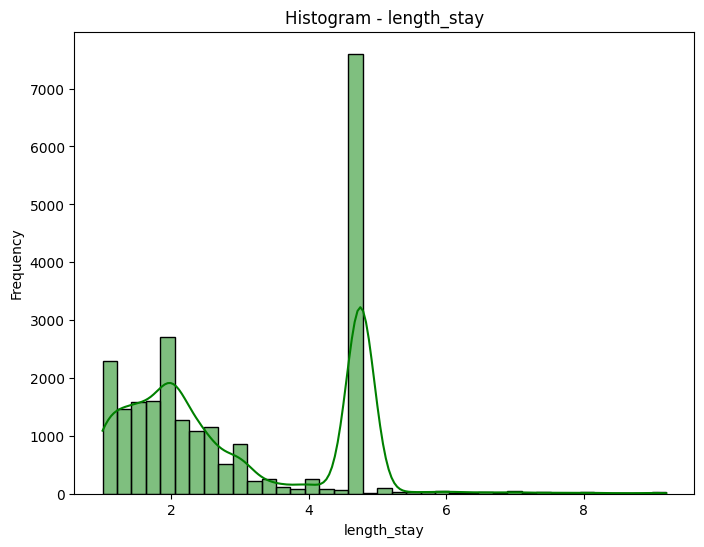

In [385]:
his_grap(df,"length_stay")

**"length_stay" sütunu için istatisksel değerler ve histogram grafiği yorumu:**

- Ortalamanın medyandan büyük olması, veri setinin hafifçe sağa çarpık olduğunu düşündürür. Bu, birkaç uzun konaklama süresinin ortalamayı yukarı çektiğini gösterir.
- Grafikte de düşük değerler sol tarfta yüksek sıklıkta olduğundan hafif sağa çarpıklık vardır.
- Standart sapma değeri, konaklama sürelerinin ortalama etrafında makul bir yayılım gösterdiğini belirtir. Sürelerin birbirinden çok farklı olmadığını gösterir.


## **VERİ GÖRSELLEŞTİRME**

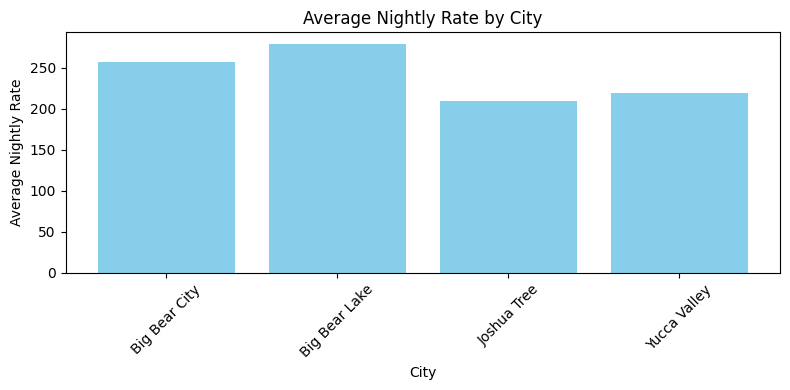

In [386]:
# Şehirlere göre günlük kira ücreti hesaplanır.
average_rates = df.groupby('city')['nightly_rate'].mean().reset_index()

# Grafiği oluşturma
plt.figure(figsize=(8,4))
plt.bar(average_rates['city'], average_rates['nightly_rate'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Nightly Rate')
plt.title('Average Nightly Rate by City')
plt.xticks(rotation=45)
plt.tight_layout()

* Grafiğe göre en fazla gecelik kira ücretinin "Big Bear Lake" şehrinde en azı ise "Joshua Tree" şehrilde olduğu görülür.

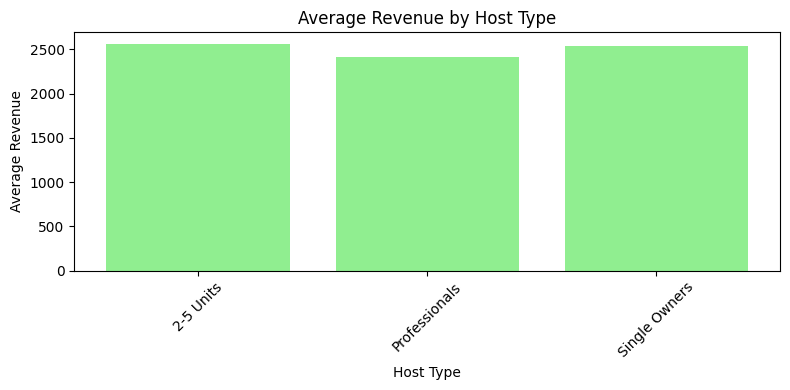

In [387]:
# Ev tipi bazında elde edilen gelir incelenir.
average_revenue = df.groupby('host_type')['revenue'].mean().reset_index()

# Grafiği oluşturma
plt.figure(figsize=(8, 4))
plt.bar(average_revenue['host_type'], average_revenue['revenue'], color='lightgreen')
plt.xlabel('Host Type')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Host Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Grafiğe göre en çok geliri "2-5 Units" ev tipi elde etmektedir.

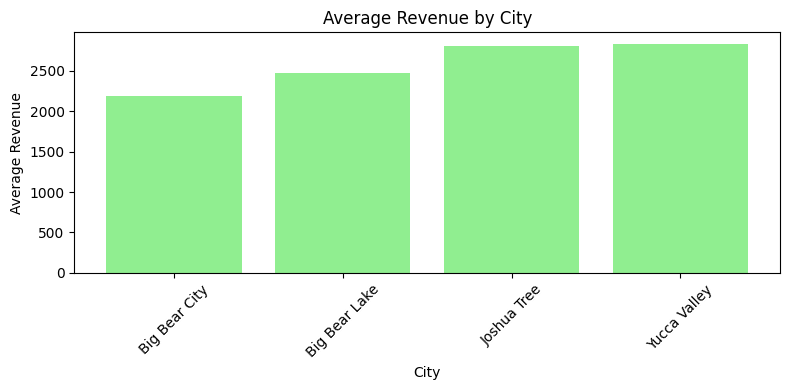

In [388]:
# Şehir bazında elde edilen gelir incelenir.
average_revenue = df.groupby('city')['revenue'].mean().reset_index()

# Grafiği oluşturma
plt.figure(figsize=(8, 4))
plt.bar(average_revenue['city'], average_revenue['revenue'], color='lightgreen')
plt.xlabel("City")
plt.ylabel('Average Revenue')
plt.title('Average Revenue by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Grafiğe göre en çok geliri "Yucca Valley" şehri elde etmektedir.

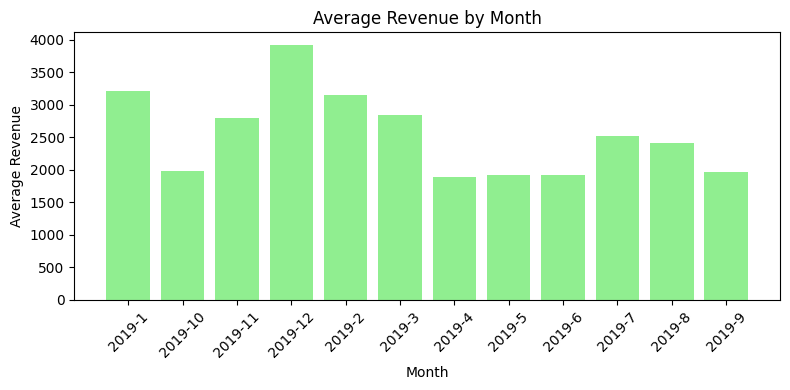

In [389]:
# Ay bazında elde edilen gelir incelenir.
average_revenue = df.groupby('month')['revenue'].mean().reset_index()

# Grafiği oluşturma
plt.figure(figsize=(8, 4))
plt.bar(average_revenue['month'], average_revenue['revenue'], color='lightgreen')
plt.xlabel("Month")
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Grafiğe göre en çok geliri "2019-12" ay elde etmektedir.

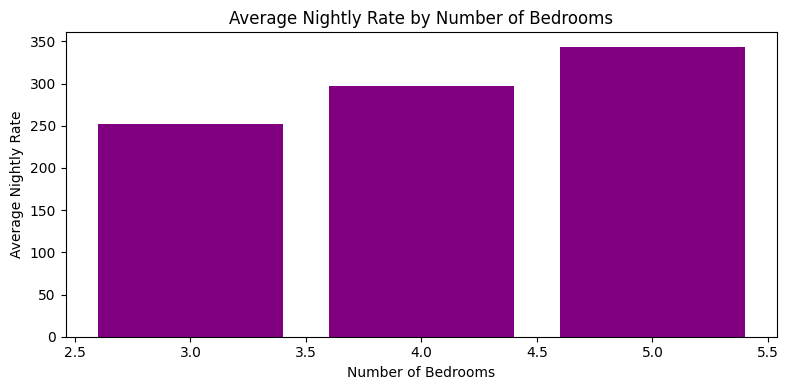

In [390]:
# Yatak odası sayısına göre ortalama gecelik kira ücreti hesaplanır
average_rate_bedrooms = df.groupby('bedrooms')['nightly_rate'].mean().reset_index()

# Grafiği oluşturma
plt.figure(figsize=(8, 4))
plt.bar(average_rate_bedrooms['bedrooms'], average_rate_bedrooms['nightly_rate'], color='purple')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Nightly Rate')
plt.title('Average Nightly Rate by Number of Bedrooms')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* Grafiğe göre 5 tane yatak odasına sahip evlerin gecelik kira ücretinin diğer şehirlerden fazla olduğu görülür. 
* Oda sayısı arttıkça gecelik kira ücreti de artmaktadır.

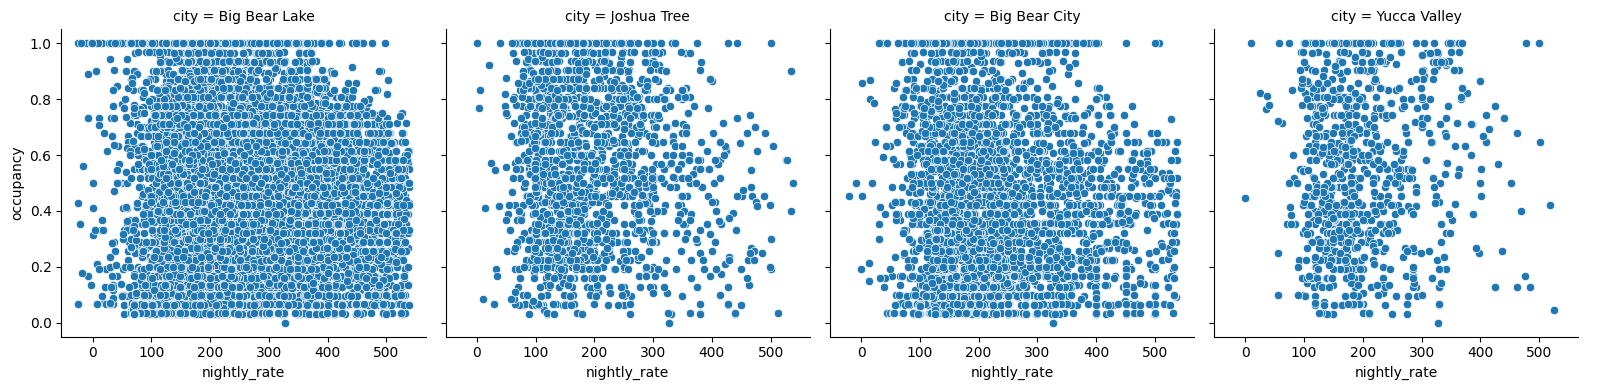

In [391]:
# Şehirler bazında günlük kira ücreti ve doluluk oranını incelenir
# FacetGrid oluşturma
g = sns.FacetGrid(df, col="city", height=4, aspect=1)
g.map(sns.scatterplot, "nightly_rate", "occupancy")
g.add_legend()
plt.show()

* Grafiğe göre en fazla doluluk oranının "Big Bear Lake" şehrinde, en az doluluk oranın ise "Yucca Valley" şehrinde olduğu görülmektedir.
* Doluluk oranı arttıkça gecelik kira ücretinin her şehirde azaldığı görülür. 
* Her şehirde gecelik kira ücreti 100-300 civarında yoğunlaşmıştır.

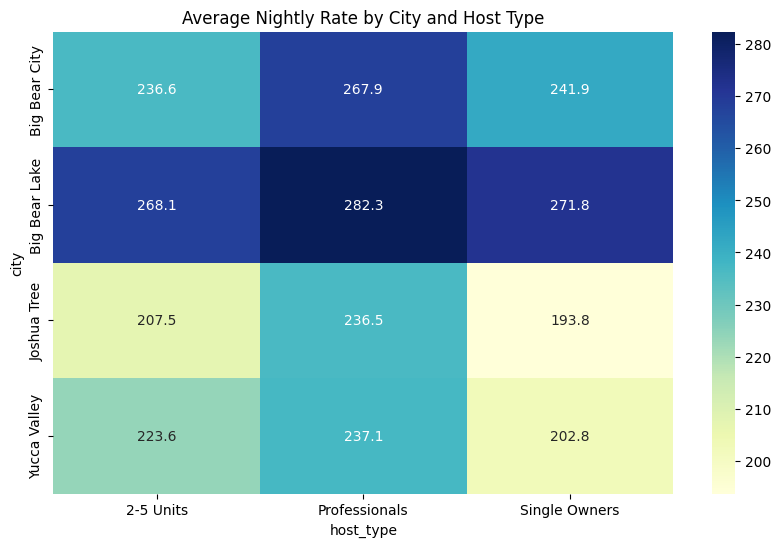

In [392]:
# Şehirler ve ev tiplerine göre ortalama günlük kira ücretini incelenir

# Pivot tablo oluşturma
pivot_table = df.pivot_table(values='nightly_rate', index='city', columns='host_type', aggfunc='mean')

# Heatmap oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Nightly Rate by City and Host Type')
plt.show()

* Tabloya göre en yüksek ortalam gecelik kira ücreti "Big Bear Lake" şehrindeki "Professionals" ev tipine sahip airnbnblere ait olduğu görülür.
* Tabloya göre en yüksek ortalam gecelik kira ücretinin ise "Joshua Tree" şehrindeki "Single Owners" ev tipine sahip airnbnblere ait olduğu görülür.

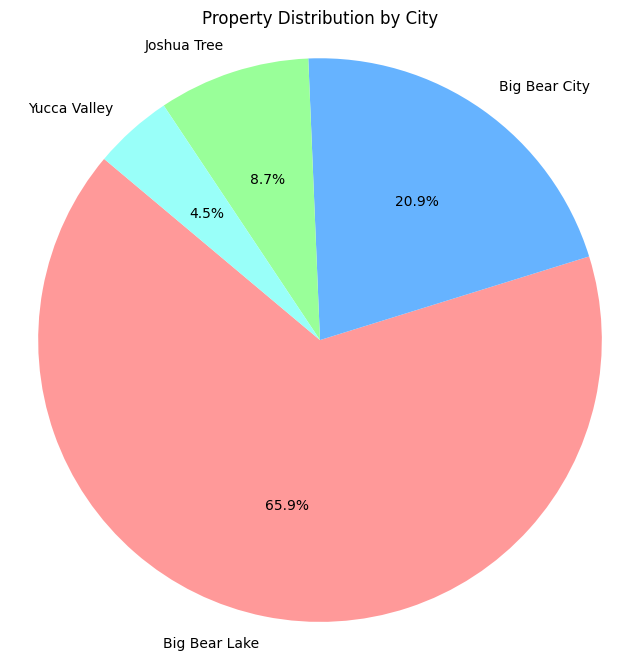

In [393]:
# Şehir bazında airbnb mülk sayısının heasplanır
city_counts = df['city'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99', '#99fff9'])
plt.title('Property Distribution by City')
plt.axis('equal')  # Eşit oranlı daire
plt.show()

* Grafiğe göre en çok airnbn sayısı "Big Bear Lake" şehrinde, en az ise "Yucca Valley" şehrinde olduğu görülmektedir.

In [394]:
# Şu anki veri seti üzerinde değişiklik yapılacağı için temzilenmiş veri bir CSV dosyasına kaydedilir. 

# DataFrame'i CSV dosyasına yazma
df.to_csv('dataset/clean_market_analysis_2019.csv', index=False)

## **ÖZELLİK MÜHENDİSLİĞİ (FEATURE ENGINEERING)**

Var olan özellikler kullanılarak yeni özellikler oluşturulur. 

In [3]:
# Artık işlemler dosya yeniden okunarak devam edilebilir, üstteki işlemleri tekrarlamaya gerek yok.
# CSV dosyasını okuma
df = pd.read_csv('dataset/clean_market_analysis_2019.csv')

In [4]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000
1,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503
2,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000
3,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503
4,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000


In [5]:
# "month" sütunu bugünden çıkarılarak kaç aydır airbnb mülkünün verisetinde yer aldığı bulunur ve yeni sütuna bu değerler eklenir.

from datetime import datetime
# "month" sütununu datetime formatına dönüştürme ve bir değişkende saklama
month_datetime = pd.to_datetime(df['month'])

# Bugünkü tarihin bulunması
today = datetime.now()

# Ay farkının hesaplanması fonksiyonu
def calculate_months_difference(date):
    return (today.year - date.year) * 12 + (today.month - date.month)

# Her bir "month" için ay farkının hesaplanması ve yeni sütuna eklenmesi
df['months_difference'] = month_datetime.apply(calculate_months_difference)

In [6]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,months_difference
0,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000,55
1,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503,54
2,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000,53
3,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503,63
4,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000,62


In [7]:
# Aylara göre doluluk oranlarını hesaplanır ve yeni sütuna bu değerler eklenir.
monthly_occupancy = df.groupby('month')['occupancy'].mean().reset_index()

print(monthly_occupancy)

# Yeni oluşturduğumuz veri setini orijinal DataFrame'e birleştirilir
df = pd.merge(df, monthly_occupancy, on='month', suffixes=('', '_avg'))

# Yeni sütun adı değiştirilir
df.rename(columns={'occupancy_avg': 'monthly_avg_occupancy'}, inplace=True)

      month  occupancy
0    2019-1   0.341227
1   2019-10   0.326350
2   2019-11   0.395695
3   2019-12   0.411305
4    2019-2   0.440424
5    2019-3   0.394770
6    2019-4   0.302981
7    2019-5   0.293081
8    2019-6   0.316713
9    2019-7   0.380213
10   2019-8   0.367976
11   2019-9   0.324808


In [8]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,months_difference,monthly_avg_occupancy
0,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000,55,0.326350
1,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503,54,0.395695
2,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000,53,0.411305
3,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503,63,0.440424
4,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000,62,0.394770


In [9]:
# Aylık kira ücretinin hesaplanması ve yeni sütuna bu değerler eklenir.
df['monthly_rate'] = df['nightly_rate'] * 30

In [10]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,months_difference,monthly_avg_occupancy,monthly_rate
0,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000,55,0.326350,13498.799745
1,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503,54,0.395695,9811.421410
2,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000,53,0.411305,13499.127087
3,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503,63,0.440424,9811.421410
4,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000,62,0.394770,13498.799745


## **DEĞİŞKENLER ARASINDAKİ İLİŞKİLERİN ANALİZİ**

### One-Hot Encoding

One-hot encoding, kategorik değişkenlerin sayısal formatta temsil edilmesi için kullanılan bir yöntemdir ve değişkenler arasındaki ilişkilerin daha iyi analiz edilebilmesi için bu kategorik değişkenlerin dönüştürülmesi gerekir.

Sayısal formatta olmayan one-hot encoding uygulanacak kategorik değikenler: ['month', 'city', 'host_type']

Sayısal formata çevirilecek değişkenler hedef değişken yani "revenue" ile ilişkili bir şekilde çevrilmeli.

In [11]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,months_difference,monthly_avg_occupancy,monthly_rate
0,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000,55,0.326350,13498.799745
1,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503,54,0.395695,9811.421410
2,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000,53,0.411305,13499.127087
3,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503,63,0.440424,9811.421410
4,AIR10000347,2019-3,92315,Big Bear Lake,2-5 Units,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000,62,0.394770,13498.799745


In [433]:
df["city"].unique() # 4 tane kategori var. Bunlar 0-1-2-3 şeklinde numaralandırılabilir.

array(['Big Bear Lake', 'Joshua Tree', 'Big Bear City', 'Yucca Valley'],
      dtype=object)

In [12]:
# Şehir bazında elede edilen gelir hesaplanır
average_revenue = df.groupby('city')['revenue'].mean().reset_index()
average_revenue.sort_values(by='revenue', ascending=False) # Azalana göre sıralanır
average_revenue

,city,revenue
0,Big Bear City,2186.881424
1,Big Bear Lake,2479.045886
2,Joshua Tree,2814.360873
3,Yucca Valley,2836.178929


In [13]:
# Yukarıda değerlere bakılarak azalandan arana olacak şekilde numalandırılma yapılmalı.
df['city'] = df['city'].replace({'Yucca Valley': 3, 'Joshua Tree': 2, 'Big Bear Lake': 1, 'Big Bear City': 0})

C:\Users\havva\AppData\Local\Temp\ipykernel_14132\4184554715.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['city'] = df['city'].replace({'Yucca Valley': 3, 'Joshua Tree': 2, 'Big Bear Lake': 1, 'Big Bear City': 0})


In [16]:
df["host_type"].unique() # 3 tane kategori var. Bunlar 0-1-2 şeklinde numaralandırılabilir.

array(['2-5 Units', 'Single Owners', 'Professionals'], dtype=object)

In [17]:
# Ev tipi bazında elede edilen gelir hesaplanır
average_revenue = df.groupby('host_type')['revenue'].mean().reset_index()
average_revenue.sort_values(by='revenue', ascending=False)
average_revenue

,host_type,revenue
0,2-5 Units,2565.032954
1,Professionals,2412.708417
2,Single Owners,2541.597628


In [18]:
# Yukarıda değerlere bakılarak azalandan arana olacak şekilde numalandırılma yapılmalı.
df['host_type'] = df['host_type'].replace({'2-5 Units': 2, 'Single Owners': 1, 'Professionals': 0})

In [19]:
df["month"].unique() # 12 tane kategori var. Bunlar 0-1-2-3-4-5-6-7-8-9-10-11 şeklinde numaralandırılabilir.

array(['2019-10', '2019-11', '2019-12', '2019-2', '2019-3', '2019-4',
       '2019-5', '2019-7', '2019-8', '2019-9', '2019-1', '2019-6'],
      dtype=object)

In [20]:
# Ay bazında elede edilen gelir hesaplanır
average_revenue = df.groupby('month')['revenue'].mean().reset_index()
average_revenue.sort_values(by='revenue', ascending=False) 
average_revenue

,month,revenue
0,2019-1,3207.837375
1,2019-10,1985.261018
2,2019-11,2792.583358
3,2019-12,3920.687876
4,2019-2,3151.603768
5,2019-3,2846.846185
6,2019-4,1896.684478
7,2019-5,1920.597332
8,2019-6,1925.148159
9,2019-7,2528.251311


In [21]:
# Yukarıda değerlere bakılarak azalandan arana olacak şekilde numalandırılma yapılmalı.
df['month'] = df['month'].replace({
    '2019-1': 10,
    '2019-2': 9,
    '2019-3': 8,
    '2019-4': 0,
    '2019-5': 1,
    '2019-6': 2,
    '2019-7': 6,
    '2019-8': 5,
    '2019-9': 3,
    '2019-10': 4,
    '2019-11': 7,
    '2019-12': 11
})

In [22]:
df.head()

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay,months_difference,monthly_avg_occupancy,monthly_rate
0,AIR10000347,4,92315,1,2,3,2,10,449.959992,31,0.032258,449.959992,8.000000,1.000000,55,0.326350,13498.799745
1,AIR10000347,7,92315,1,2,3,2,10,0.000000,30,0.000000,327.047380,30.968204,4.749503,54,0.395695,9811.421410
2,AIR10000347,11,92315,1,2,3,2,10,4949.679932,31,0.354839,449.970903,41.000000,2.400000,53,0.411305,13499.127087
3,AIR10000347,9,92315,1,2,3,2,10,0.000000,28,0.000000,327.047380,30.968204,4.749503,63,0.440424,9811.421410
4,AIR10000347,8,92315,1,2,3,2,10,899.919983,31,0.064516,449.959992,8.000000,1.000000,62,0.394770,13498.799745


### **Korelasyon Matrisi**

Bir veri setindeki sayısal değişkenler arasındaki ilişkileri gösteren bir matristir.

* 1'e yaklaşan bir korelasyon katsayısı, pozitif bir ilişkiyi gösterir. Yani, bir değişkenin değeri arttığında diğer değişkenin de artma eğiliminde olduğunu ifade eder.
* -1'e yaklaşan bir korelasyon katsayısı, negatif bir ilişkiyi gösterir. Yani, bir değişkenin değeri arttığında diğer değişkenin azalma eğiliminde olduğunu ifade eder.
* 0'a yaklaşan bir korelasyon katsayısı, değişkenler arasında bir ilişki olmadığını veya çok zayıf bir ilişki olduğunu gösterir.

In [23]:
# Sadece sayısal veriler için korelasyon hesabı yapılır.

def corr_matrix(df):
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_df.corr()

    # Korelasyon matrisini görselleştirme
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Değişkenler Arası Korelasyon Matrisi (Sadece Sayısal Değişkenler)')
    plt.show()


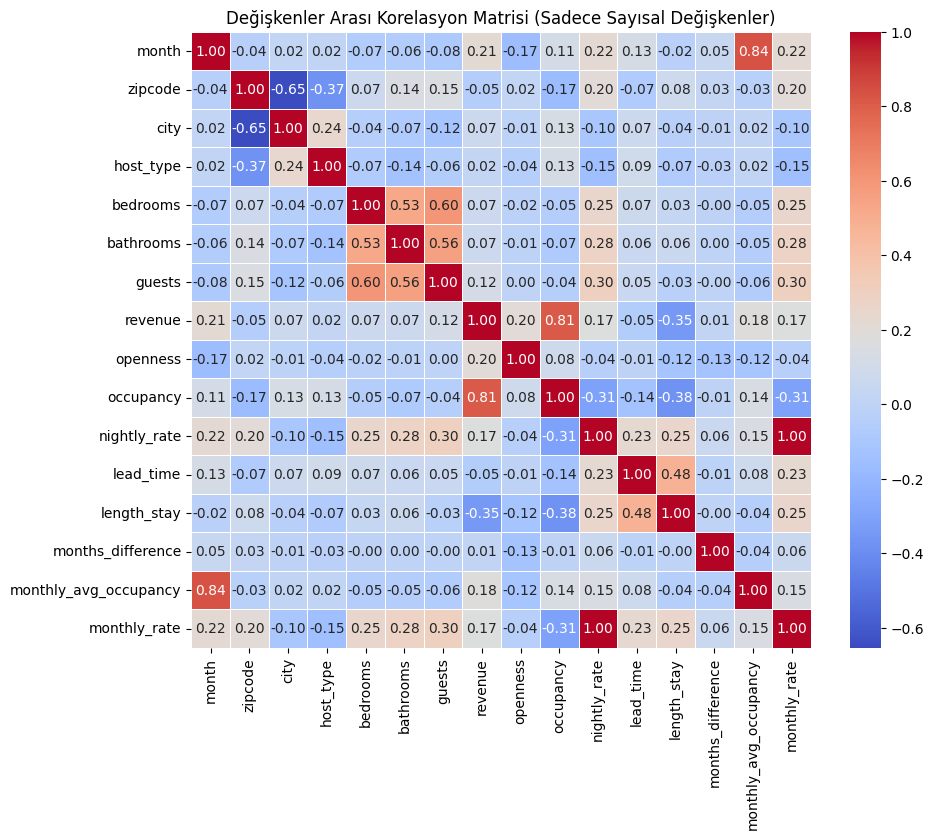

In [24]:
corr_matrix(df)

Korelasyon matrisindeki sütunlar arasındaki korelasyon değerlerinin 1'e ve -1'e yaklaşması, sütunlar arasında pozitif ve negatif ilişkinin yüksek olmasını gösterir.

- Her sütunun kendisi ile arasındali ilişki zaten 1'dir.

- "month" ile "monthly_avg_occupancy" arasında 0.84'lük bir pozitif ilişki vardır.
- "revenue" ile "occupancy" arasında 0.81'lik bir pozitif ilişki vardır.
- "quest" ile "bedrooms" arasında 0.60'lık bir pozitif ilişiki vardır.

- "city" ile "zipcode" arasında -0.65'lik bir negatif ilişki vardır.
- "revenue" ile "length_stay" arasında -0.38'lik bir negatif ilişki vardır.
- "length_stay" ile "occupancy" arasında -0.39'luk bir negatif ilişki vardır.


In [25]:
df.columns

Index(['unified_id', 'month', 'zipcode', 'city', 'host_type', 'bedrooms',
       'bathrooms', 'guests', 'revenue', 'openness', 'occupancy',
       'nightly_rate', 'lead_time', 'length_stay', 'months_difference',
       'monthly_avg_occupancy', 'monthly_rate'],
      dtype='object')

### **Özellik Seçimi (Feature Selection)**

Makine öğrenimi modeli oluştururken, belirli özelliklerin seçilmesi gereklidir. Sayısal olmayan ifadeler makine öğrenimi modellerinde genellikle yok sayılır. Ayrıca, sayısal ifadeler arasında da hedef değişkeni (bağımlı değişken) etkilemeyen değişkenler model başarısını olumsuz etkileyebilir.

Bu bağlamda, hedef değişken olarak elde edilen gelir miktarını ifade eden "revenue" sütunu seçilir. Diğer sütunlar ise bağımsız değişkenler olarak değerlendirilir. Ancak, bazı değişkenler "revenue" ile çok ilişkili değildir. En ilişkili değişkenleri belirlemek için korelasyon matrisine bakılır ve düşük ilişkiye sahip sütunlar veri setinden çıkarılarak makine öğrenimi modeli için uygun bir veri seti oluşturulur.

Korelasyon matrisine bakıldığında "revenue" sütunu ile 0.1'den büyük veya -0.1'den küçük korelasyona sahip olan değişkenler belirlenir. Bu değişkenler:

- **occupancy**: 0.81
- **length_stay**: -0.35
- **month**: 0.21
- **openness**: 0.20
- **monthly_avg_occupancy**: 0.18
- **nightly_rate**: 0.17
- **monthly_rate**: 0.17
- **guests**: 0.12

Bu özellikler, makine öğrenimi modeli için bağımlı değişkeni etkileyen bağımsız değişkenler olarak seçilebilir.

Özetle, "revenue" sütunu ile belirgin ilişkiye sahip olan yukarıdaki değişkenler, modelde kullanılacak özellikler olarak seçilir ve diğer özellikler veri setinden çıkarılır. Bu şekilde, model başarısını artıracak, daha anlamlı ve etkili bir veri seti elde edilir.

In [28]:
# Diğer değişkenler veri setinden silinebilir.

# Model için seçilen özellikler
selected_features = [
    'occupancy', 'length_stay', 'month', 'openness',
    'monthly_avg_occupancy', 'nightly_rate', 'monthly_rate', 'guests'
]

# Seçilen özellikler dışında kalan sütunları silme
df_ML = df[selected_features]


In [29]:
df_ML.head()

,occupancy,length_stay,month,openness,monthly_avg_occupancy,nightly_rate,monthly_rate,guests
0,0.032258,1.000000,4,31,0.326350,449.959992,13498.799745,10
1,0.000000,4.749503,7,30,0.395695,327.047380,9811.421410,10
2,0.354839,2.400000,11,31,0.411305,449.970903,13499.127087,10
3,0.000000,4.749503,9,28,0.440424,327.047380,9811.421410,10
4,0.064516,1.000000,8,31,0.394770,449.959992,13498.799745,10


In [30]:
# Daha sonrasında makine öğrenimi modellerinde kullanmak için veri yeni bir CSV dosyasına kaydedilir. 
# DataFrame'i CSV dosyasına yazma
df_ML.to_csv('dataset/market_analysis_2019_for_ML.csv', index=False)

In [31]:
df_ML.isnull().sum()

occupancy                0
length_stay              0
month                    0
openness                 0
monthly_avg_occupancy    0
nightly_rate             0
monthly_rate             0
guests                   0
dtype: int64